# Load all the required Libraries

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from datetime import date
#import vpython as vs

# Data Preparation

### Load the csv file 

In [2]:
phooddata18 = pd.read_csv("foodlogloc18.csv")

In [3]:
phooddata18.head(5)

,Unnamed: 0,X,id,itemname,itemtype,datecreated,datedumped,mealtype,actiontaken,actionreason,quantity,quantitytype,locationid
0,18528,19817,21082,Grill,Menu,2017-06-22 17:49:19,2017-06-22,Lunch,Composted,Over Production,4.6,Pound,18
1,18543,19832,21099,Hot Line,Menu,2017-07-12 12:58:06,2017-07-12,Breakfast,Discarded,Over Production,4.6,Pound,18
2,18544,19833,21100,Post Consumer,Menu,2017-07-12 13:27:42,2017-07-12,Breakfast,Composted,Over Production,12.5,Pound,18
3,18545,19834,21101,Trim Waste,Menu,2017-07-12 13:34:35,2017-07-12,Breakfast,Composted,Over Production,22.0,Pound,18
4,18546,19835,21102,Trim Waste,Menu,2017-07-12 17:45:15,2017-07-12,Lunch,Composted,Over Production,12.0,Pound,18


In [4]:
phooddata18.describe()

,Unnamed: 0,X,id,quantity,locationid
count,690.000000,690.000000,690.000000,690.000000,690.0
mean,19876.028986,21178.163768,22492.943478,15.444058,18.0
std,1421.738120,1428.895412,1487.639264,12.312209,0.0
min,18528.000000,19817.000000,21082.000000,0.000000,18.0
25%,18726.250000,20015.250000,21290.250000,6.525000,18.0
50%,19171.500000,20477.500000,21755.500000,12.450000,18.0
75%,21678.750000,22989.750000,24335.750000,21.400000,18.0
max,22393.000000,23704.000000,25136.000000,85.000000,18.0


### Clean Null Values

In [5]:
phooddata18clean = phooddata18[phooddata18.notnull()]

In [6]:
phooddata18clean.head(5)

,Unnamed: 0,X,id,itemname,itemtype,datecreated,datedumped,mealtype,actiontaken,actionreason,quantity,quantitytype,locationid
0,18528,19817,21082,Grill,Menu,2017-06-22 17:49:19,2017-06-22,Lunch,Composted,Over Production,4.6,Pound,18
1,18543,19832,21099,Hot Line,Menu,2017-07-12 12:58:06,2017-07-12,Breakfast,Discarded,Over Production,4.6,Pound,18
2,18544,19833,21100,Post Consumer,Menu,2017-07-12 13:27:42,2017-07-12,Breakfast,Composted,Over Production,12.5,Pound,18
3,18545,19834,21101,Trim Waste,Menu,2017-07-12 13:34:35,2017-07-12,Breakfast,Composted,Over Production,22.0,Pound,18
4,18546,19835,21102,Trim Waste,Menu,2017-07-12 17:45:15,2017-07-12,Lunch,Composted,Over Production,12.0,Pound,18


In [7]:
phooddata18clean.describe()

,Unnamed: 0,X,id,quantity,locationid
count,690.000000,690.000000,690.000000,690.000000,690.0
mean,19876.028986,21178.163768,22492.943478,15.444058,18.0
std,1421.738120,1428.895412,1487.639264,12.312209,0.0
min,18528.000000,19817.000000,21082.000000,0.000000,18.0
25%,18726.250000,20015.250000,21290.250000,6.525000,18.0
50%,19171.500000,20477.500000,21755.500000,12.450000,18.0
75%,21678.750000,22989.750000,24335.750000,21.400000,18.0
max,22393.000000,23704.000000,25136.000000,85.000000,18.0


### Details of our data

In [8]:
pandas_profiling.ProfileReport(phooddata18clean)

Number of variables,13
Number of observations,690
Total Missing (%),0.0%
Total size in memory,70.1 KiB
Average record size in memory,104.0 B
Numeric,2
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,5


In [9]:
uniqueitems = phooddata18clean.itemname.unique()
uniqueitems

array(['Grill', 'Hot Line', 'Post Consumer', 'Trim Waste', 'Catering',
       'Dessert', 'Deli', 'Salad', 'Pizza', 'Pasta', 'Soup',
       'Gluten Free'], dtype=object)

## Feature Selection

### Removing unimportant variables

In [10]:
phooddata18cleanfilter = phooddata18clean.filter(['itemname','datedumped','mealtype','quantity'], axis=1)

In [11]:
pandas_profiling.ProfileReport(phooddata18cleanfilter)

Number of variables,4
Number of observations,690
Total Missing (%),0.0%
Total size in memory,21.6 KiB
Average record size in memory,32.0 B
Numeric,1
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Change Date Time function

In [12]:
phooddata18cleanfilter['date'] = pd.to_datetime(phooddata18cleanfilter['datedumped'])
#phooddata18cleanfilter['date'] = [time.date() for time in phooddata18cleanfilter['date']]

In [13]:
phooddata18cleanfilter.head(5)

,itemname,datedumped,mealtype,quantity,date
0,Grill,2017-06-22,Lunch,4.6,2017-06-22
1,Hot Line,2017-07-12,Breakfast,4.6,2017-07-12
2,Post Consumer,2017-07-12,Breakfast,12.5,2017-07-12
3,Trim Waste,2017-07-12,Breakfast,22.0,2017-07-12
4,Trim Waste,2017-07-12,Lunch,12.0,2017-07-12


In [14]:
phooddata18cleanfilter = phooddata18cleanfilter.drop(['datedumped'], axis=1)

In [15]:
pandas_profiling.ProfileReport(phooddata18cleanfilter)

Number of variables,4
Number of observations,690
Total Missing (%),0.0%
Total size in memory,21.6 KiB
Average record size in memory,32.0 B
Numeric,1
Categorical,2
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [1124]:
phooddata18cleanfilter.date.min()

Timestamp('2017-06-22 00:00:00')

### One Hot Encoding

In [1125]:
#One-hot encode categorical features
phooddata18cleanfilter = pd.get_dummies(phooddata18cleanfilter)
phooddata18cleanfilter.head(5)

,quantity,date,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_Breakfast,mealtype_Dinner,mealtype_Lunch
0,4.6,2017-06-22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,4.6,2017-07-12,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,12.5,2017-07-12,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,22.0,2017-07-12,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,12.0,2017-07-12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


(array([736511., 736542., 736573., 736603., 736634., 736664.]),
 <a list of 6 Text xticklabel objects>)

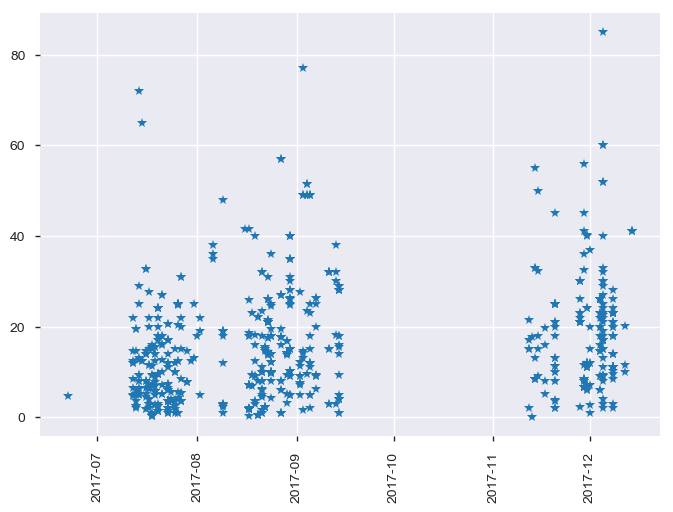

In [1126]:
plt.plot(phooddata18cleanfilter['date'], phooddata18cleanfilter['quantity'], '*')
plt.xticks(rotation='vertical')

In [1127]:
pandas_profiling.ProfileReport(phooddata18cleanfilter)

Number of variables,17
Number of observations,690
Total Missing (%),0.0%
Total size in memory,21.0 KiB
Average record size in memory,31.0 B
Numeric,1
Categorical,0
Boolean,15
Date,1
Text (Unique),0
Rejected,0


In [1128]:
datemin = phooddata18cleanfilter['date'].min()
datemin

Timestamp('2017-06-22 00:00:00')

In [1129]:
dateminordinal = datemin.toordinal()
dateminordinal

736502

In [1130]:
datemax = phooddata18cleanfilter['date'].max()
datemax

Timestamp('2017-12-14 00:00:00')

In [1131]:
datemaxordinal = datemax.toordinal()
datemaxordinal

736677

## Date Time other approach


#### python 
*** <br><font color=blue>_phooddata18cleanfilter['year'] = phooddata18cleanfilter.date.dt.year<br>  phooddata18cleanfilter['month'] = phooddata18cleanfilter.date.dt.month  <br>phooddata18cleanfilter['day'] = phooddata18cleanfilter.date.dt.day_</font>

In [1132]:
phooddata18cleanfilter.head(5)

,quantity,date,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_Breakfast,mealtype_Dinner,mealtype_Lunch
0,4.6,2017-06-22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,4.6,2017-07-12,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,12.5,2017-07-12,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,22.0,2017-07-12,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,12.0,2017-07-12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [1133]:
phooddata18cleanfilter['date'] = phooddata18cleanfilter['date'].apply(lambda x: x.toordinal())

In [1134]:
phooddata18cleanfilter.head(5)

,quantity,date,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_Breakfast,mealtype_Dinner,mealtype_Lunch
0,4.6,736502,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,4.6,736522,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,12.5,736522,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,22.0,736522,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,12.0,736522,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [1135]:
phooddata18cleanfilter['date'] = (phooddata18cleanfilter['date'] - min(phooddata18cleanfilter['date'])+1)

In [1136]:
phooddata18cleanfilter.head(5)

,quantity,date,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_Breakfast,mealtype_Dinner,mealtype_Lunch
0,4.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,4.6,21,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,12.5,21,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,22.0,21,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,12.0,21,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [1137]:
datemaxordinal = phooddata18cleanfilter.date.max()
datemaxordinal

176

In [1138]:
Compare = pd.DataFrame(columns=['Model Name', 'MAE'])

In [1139]:
Compare

,Model Name,MAE


# Training and Testing Sets

### Features and Labels

In [1140]:
features = phooddata18cleanfilter

In [1141]:
# Using numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['quantity'])

In [1142]:
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('quantity', axis = 1)

In [1143]:
# Saving feature names for later use
feature_list = list(features.columns)

In [1144]:
# Convert to numpy array
features = np.array(features)

In [1145]:
labels

array([ 4.6,  4.6, 12.5, 22. , 12. , 12. , 14.5,  8.5,  5. ,  6.5,  5. ,
        6. , 14.5,  3.5,  2. , 19.5, 19.5,  5.2,  5.2,  2.5,  2.5,  2.5,
       29. , 13. ,  6.5, 25. ,  5. ,  9.2,  9.2, 72. ,  8. ,  8. ,  5.2,
        5.2, 12.6,  6.2, 12.5, 65. , 12.5,  5.2,  1.8,  1.8,  4.4, 14.5,
        8. ,  8. ,  6.4, 32.8, 32.8, 14. , 14. , 14. ,  7.2,  2.8, 19.8,
        4. ,  7.4,  6.6, 27.6,  4. , 21.8,  2. ,  6.2,  3. ,  3. , 15. ,
       11.5, 11.5, 11.2,  1. , 16. , 15.5,  9.3,  9.3, 15.2, 15. , 15.5,
        0.5,  7. ,  0.3,  0.3,  0.3,  6.8,  5. ,  2.7,  2.7,  7.8, 12.4,
        5.8,  5.8,  5.8,  5.8,  5.8,  8.8,  8.8, 14. , 14. , 15.4, 15.4,
        2.4,  2.4,  2.4,  9.6,  9.6,  9.6,  9.6,  9.6,  3. , 18. , 18. ,
       24. , 24. , 24. , 24. , 20. ,  1.4,  1.4,  1.4,  1.4, 22. , 17. ,
       17. , 16.2, 27. , 27. , 10. ,  5.2,  5.2,  7. , 18. , 18. , 16. ,
       12.6, 11. , 17. , 17. , 17. , 17. ,  6.5,  3.6,  1. ,  2. ,  2. ,
        2. ,  2. ,  1. , 14. , 12. , 12. ,  3.6,  3

In [1146]:
features

array([[  1,   0,   0, ...,   0,   0,   1],
       [ 21,   0,   0, ...,   1,   0,   0],
       [ 21,   0,   0, ...,   1,   0,   0],
       ...,
       [176,   0,   0, ...,   1,   0,   0],
       [176,   0,   0, ...,   1,   0,   0],
       [176,   0,   0, ...,   1,   0,   0]])

In [1147]:
# Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [1148]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (517, 16)
Training Labels Shape: (517,)
Testing Features Shape: (173, 16)
Testing Labels Shape: (173,)


## Random Forest

In [1149]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [1150]:
train_features.dtype

dtype('int64')

In [1151]:
train_labels.dtype

dtype('float64')

In [1152]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [1153]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [1154]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [1155]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 5.94 degrees.


In [1156]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

In [1157]:
rfer = mean_absolute_error(test_labels, predictions)

In [1158]:
rfer

5.944496018709148

In [1159]:
Compare

,Model Name,MAE


In [1160]:
Compare.loc[0] = ['Random Forest', rfer]

In [1161]:
Compare

,Model Name,MAE
0,Random Forest,5.944496


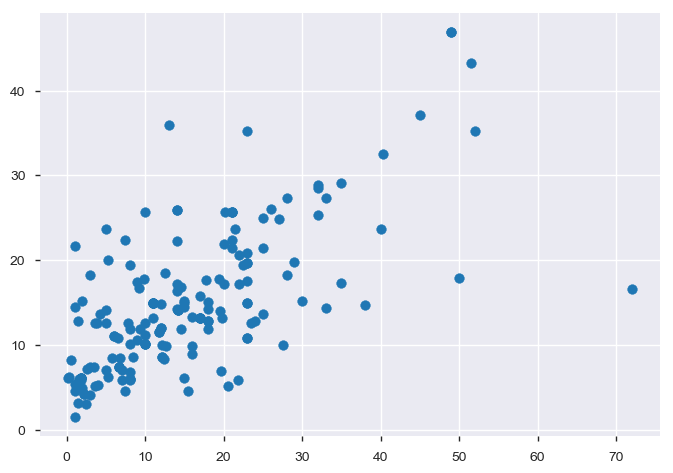

In [1162]:
## The line / model
plt.scatter(test_labels, predictions)



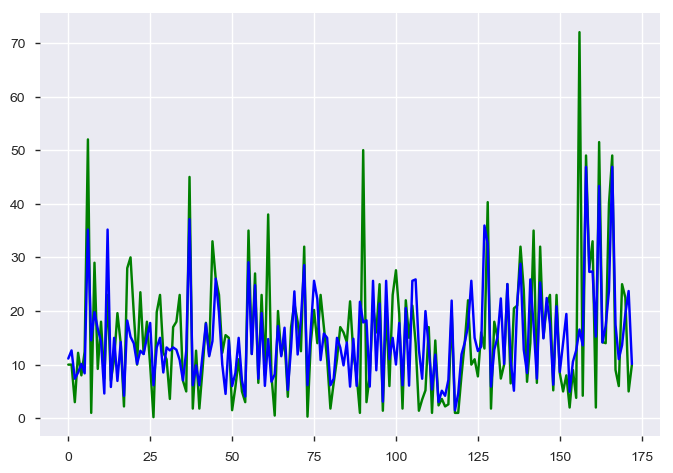

In [1163]:
plt.plot(test_labels, color='green')
plt.plot(predictions, color='blue')

plt.show()

## Linear Regression

In [1164]:
lm = LinearRegression()

In [1165]:
lm.fit(train_features,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1166]:
lmpredictions = lm.predict(test_features)

In [1167]:
lnrer = mean_absolute_error(test_labels, lmpredictions)
lnrer

8.175694097924183

In [1168]:
Compare.loc[1] = ['Linear Regression', lnrer]
Compare

,Model Name,MAE
0,Random Forest,5.944496
1,Linear Regression,8.175694


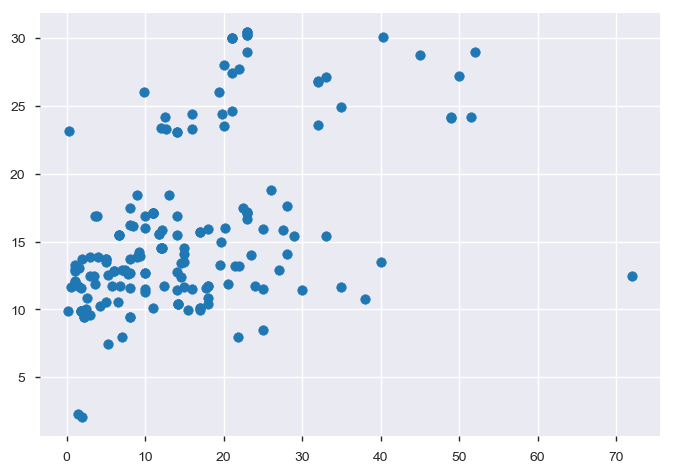

In [1169]:
plt.scatter(test_labels,lmpredictions)

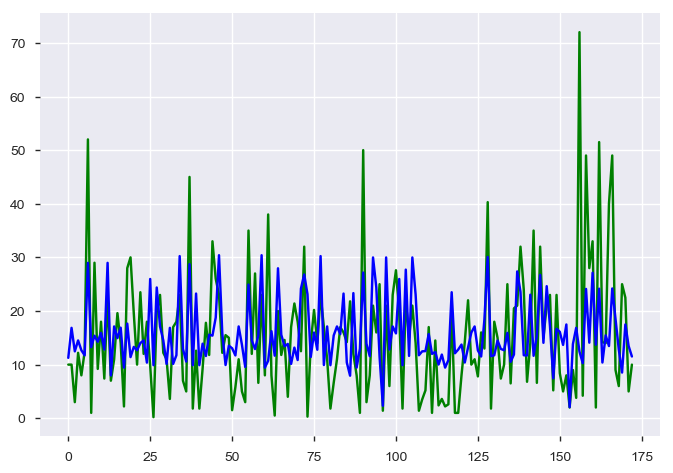

In [1170]:
plt.plot(test_labels, color='green')
plt.plot(lmpredictions, color='blue')

plt.show()

## Logistic Regression

In [1171]:
logreg = LogisticRegression()

In [1172]:
train_labels

array([21. ,  1.4, 35. , 14.5, 15. ,  8. , 10. , 17.6,  9.6, 20. , 17. ,
        7.8, 18.2,  5.8,  8.5,  5.8,  2. , 28. , 25. , 14.2, 32.5,  3.6,
        1. ,  9.2, 14.5,  4.4,  9.3, 11. ,  7.8, 22. , 11.5,  6. , 11. ,
       11. ,  3.6, 40. , 17.8, 21. , 77. , 26. , 15. , 15. , 23. ,  5. ,
       32. , 57. , 18.2,  0.3, 13. , 19.5, 10.2,  7. , 24.2,  0.5, 13.8,
       35. , 17. ,  1. ,  9.8,  5.2, 49. , 21.4,  6.5, 29. , 31. , 48. ,
       15. , 11. ,  6.6,  2.7, 10. , 10. , 37. , 12.5,  3.6, 22. , 23. ,
        7.9, 31. ,  8.8, 52. , 15. , 14.6,  9.2, 25. , 24. ,  6.2,  3.6,
       15. ,  9.8, 11.2, 23. , 24.8,  7. ,  5.8, 12. ,  1.4, 10. , 60. ,
        7. ,  4.6, 14. ,  6.6, 28. , 49. ,  1.4,  2.2, 26. , 26. , 11. ,
       26.2,  2. ,  8.5, 30. , 23. , 20. ,  8. , 11. ,  6.4,  9. , 15. ,
       41. , 12. ,  3. , 11.5,  7.9,  4.2,  2.4, 14. , 11. , 36. ,  3.6,
       17.5, 27. ,  3.6, 27. , 56. , 18. , 25. ,  5. ,  9. , 10.2, 24. ,
       27. ,  2. ,  2. , 85. ,  2.5, 12. , 40. , 21

In [1173]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
print(train_labels_encoded)
print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))

[ 89   4 114  67  69  41  51  79  49  86  77  39  82  28  43  28   7 105
  99  65 111  17   3  46  67  20  47  53  39  91  55  29  53  53  17 118
  80  89 131 101  69  69  93  24 109 128  82   1  62  85  52  35  96   2
  63 114  77   3  50  25 123  90  32 106 108 122  69  53  33  12  51  51
 116  60  17  91  93  40 108  44 125  69  68  46  99  95  30  17  69  50
  54  93  98  35  28  56   4  51 129  35  22  64  33 105 123   4   8 101
 101  53 102   7  43 107  93  86  41  53  31  45  69 119  56  14  55  40
  19   9  64  53 115  17  78 103  17 103 127  81  99  24  45  52  95 103
   7   7 132  10  56 118  89  69  67 101  99  51  27 107  54   6  73  81
   2  17  25   3  29  95  65  51  80  33 102  14  21  25  69  81  46  67
 101  58   3  89 101  44   6  64  93  54  69  14  18  56  41  32  86   9
  85 112  86 107  91  86  18  89  99   3  81  51  56  84  24 119  16  64
  65  56 130  17  35  53  52  76  51  35  41  99  27   3 101  56  45  93
  48  95 101  55 119  18  89  29  90   3  46  63 10

In [1174]:
logreg.fit(train_features,train_labels_encoded)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1175]:
logregpredictions = logreg.predict(test_features)

In [1176]:
logregpredictions = list(lab_enc.inverse_transform(logregpredictions))

In [1177]:
lgrer = mean_absolute_error(test_labels, logregpredictions)
lgrer

8.138728323699421

In [1178]:
Compare.loc[2] = ['Logistic Regression', lgrer]
Compare

,Model Name,MAE
0,Random Forest,5.944496
1,Linear Regression,8.175694
2,Logistic Regression,8.138728


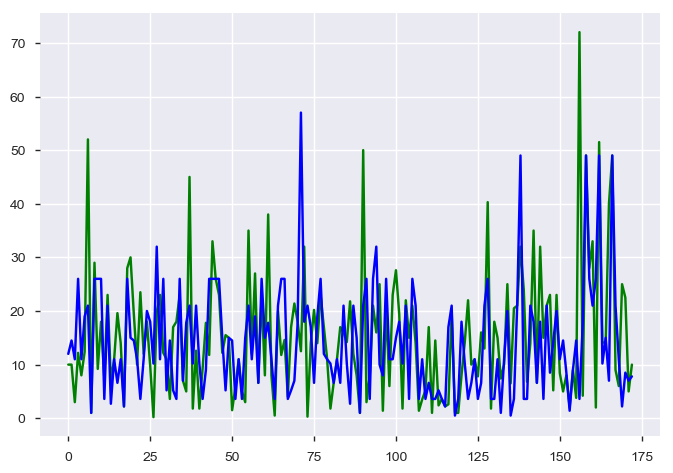

In [1179]:
plt.plot(test_labels, color='green')
plt.plot(logregpredictions, color='blue')

plt.show()

## Support Vector Machine

In [1180]:
svmm = svm.SVC()

In [1181]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))

continuous
multiclass
multiclass


In [1182]:
svmm.fit(train_features,train_labels_encoded)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [1183]:
svmpredictions = svmm.predict(test_features)

In [1184]:
svmpredictions = list(lab_enc.inverse_transform(svmpredictions))

In [1185]:
svmer = mean_absolute_error(test_labels, svmpredictions)
svmer

8.723699421965318

In [1186]:
Compare.loc[3] = ['Support Vector Machine', svmer]
Compare

,Model Name,MAE
0,Random Forest,5.944496
1,Linear Regression,8.175694
2,Logistic Regression,8.138728
3,Support Vector Machine,8.723699


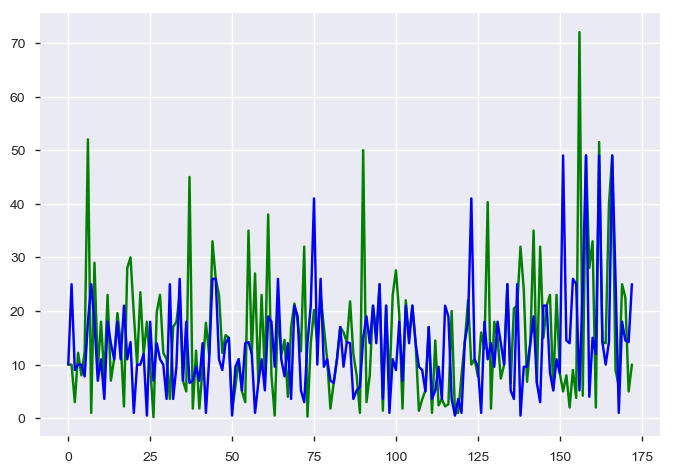

In [1187]:
plt.plot(test_labels, color='green')
plt.plot(svmpredictions, color='blue')

plt.show()

## Principal Component Analysis

In [1188]:
pca = PCA()
regr = LinearRegression()

In [1189]:
model = LinearRegression()
rfe = RFE(model,3)

In [1190]:
fit_model=rfe.fit(train_features,train_labels)
print(fit_model.get_support())

[False False False False  True False False False  True  True False False
 False False False False]


In [1191]:
model = ExtraTreesRegressor()
model.fit(train_features,train_labels)
print(model.feature_importances_)

[0.56958526 0.0071231  0.00518281 0.0075704  0.00247747 0.01497054
 0.02744821 0.00159175 0.00159376 0.21638245 0.01030652 0.
 0.03747187 0.02448495 0.04579635 0.02801454]


In [1192]:
 etrpredictions= model.predict(test_features)

In [1193]:
etrer = mean_absolute_error(test_labels, etrpredictions)
etrer

5.68665046899151

In [1194]:
Compare.loc[4] = ['Principal Component Analysis', etrer]
Compare

,Model Name,MAE
0,Random Forest,5.944496
1,Linear Regression,8.175694
2,Logistic Regression,8.138728
3,Support Vector Machine,8.723699
4,Principal Component Analysis,5.686650


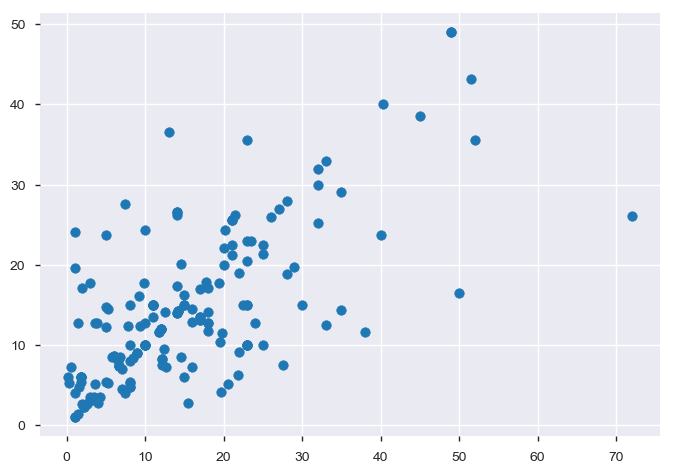

In [1195]:
plt.scatter(test_labels,etrpredictions)

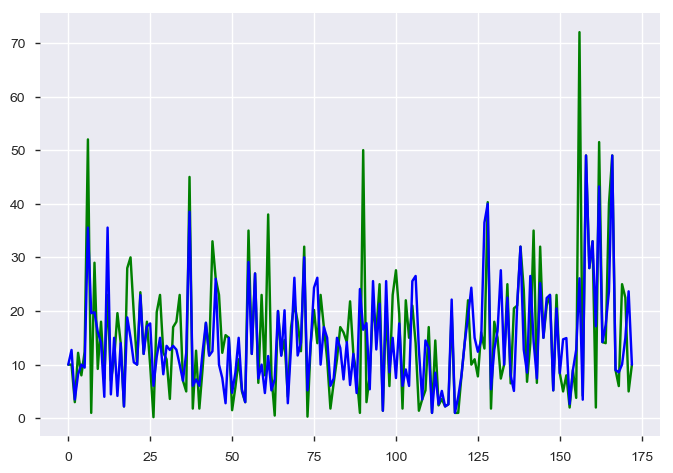

In [1196]:
plt.plot(test_labels, color='green')
plt.plot(etrpredictions, color='blue')

plt.show()

## Lasso Regression

In [1197]:
# Lasso regression object
lasso = Lasso(alpha = 0.4, normalize = True)


In [1198]:
# Fit to data
lasso.fit(train_features,train_labels)


Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [1199]:
lassopredictions= lasso.predict(test_features)

In [1200]:
lsrer = mean_absolute_error(test_labels, lassopredictions)
lsrer

9.088187743875851

In [1201]:
Compare.loc[5] = ['Lasso Regression', lsrer]
Compare

,Model Name,MAE
0,Random Forest,5.944496
1,Linear Regression,8.175694
2,Logistic Regression,8.138728
3,Support Vector Machine,8.723699
4,Principal Component Analysis,5.686650
5,Lasso Regression,9.088188


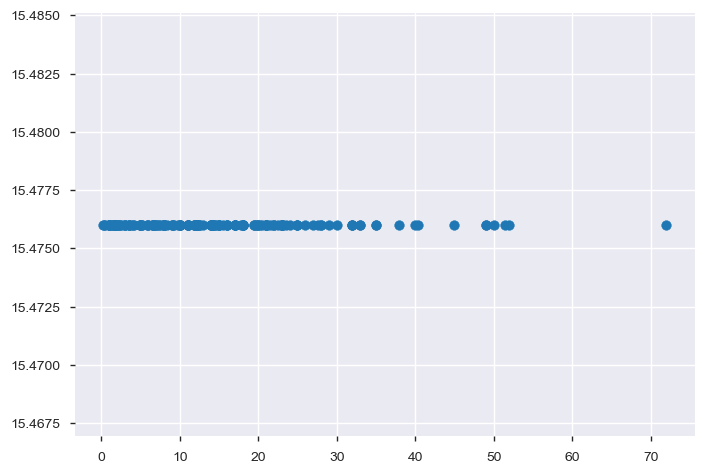

In [1202]:
plt.scatter(test_labels,lassopredictions)

## Gradient Boosted Regressor

In [1203]:
gbrclf = GradientBoostingRegressor()
gbrclf.fit(train_features,train_labels)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [1204]:
predicted = gbrclf.predict(test_features)
expected = test_labels



In [1205]:
gbmer = mean_absolute_error(test_labels, predicted)
gbmer

6.6939722184329025

In [1206]:
Compare.loc[6] = ['Gradient Boosting Machine', gbmer]
Compare

,Model Name,MAE
0,Random Forest,5.944496
1,Linear Regression,8.175694
2,Logistic Regression,8.138728
3,Support Vector Machine,8.723699
4,Principal Component Analysis,5.686650
5,Lasso Regression,9.088188
6,Gradient Boosting Machine,6.693972


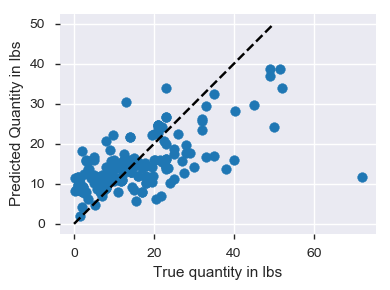

In [1207]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True quantity in lbs')
plt.ylabel('Predicted Quantity in lbs')
plt.tight_layout()

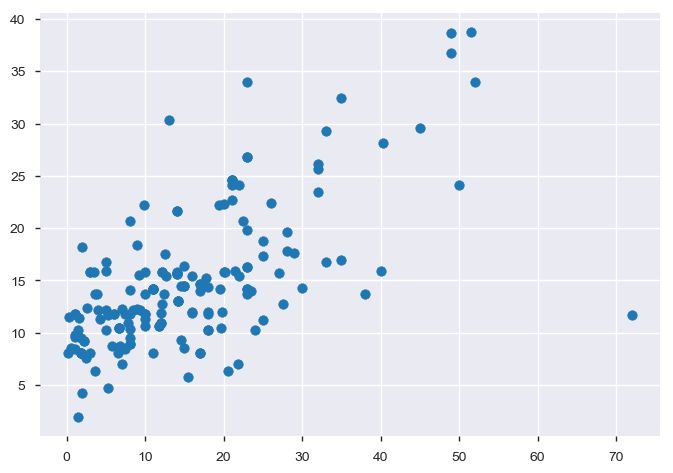

In [1208]:
plt.scatter(test_labels,predicted)

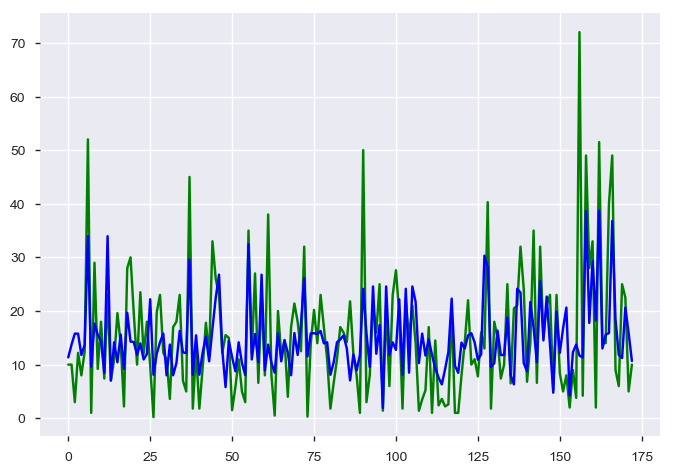

In [1209]:
plt.plot(test_labels, color='green')
plt.plot(predicted, color='blue')

plt.show()

# Model Comparison

In [1210]:
Compare

,Model Name,MAE
0,Random Forest,5.944496
1,Linear Regression,8.175694
2,Logistic Regression,8.138728
3,Support Vector Machine,8.723699
4,Principal Component Analysis,5.686650
5,Lasso Regression,9.088188
6,Gradient Boosting Machine,6.693972


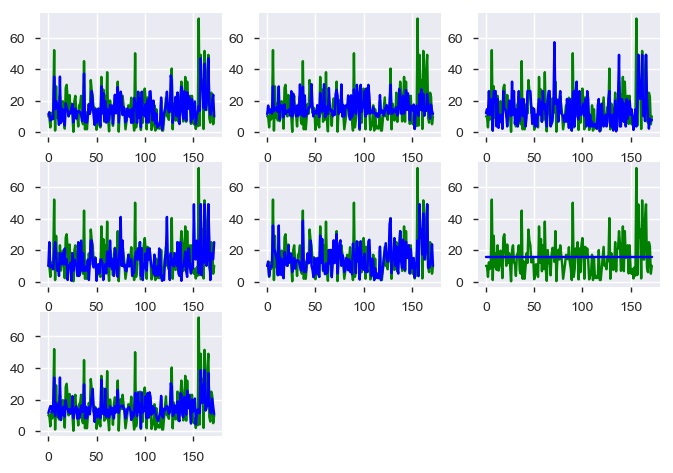

In [1211]:
import matplotlib.pyplot as plt

x = test_labels
y = [predictions,lmpredictions,logregpredictions,svmpredictions,etrpredictions,lassopredictions,predicted]
fig = plt.figure()

plt.subplot(3, 3, 1)
plt.plot(x, color='green')
plt.plot(y[0], color='blue')


plt.subplot(3, 3, 2)
plt.plot(x, color='green')
plt.plot(y[1], color='blue')


plt.subplot(3, 3, 3)
plt.plot(x, color='green')
plt.plot(y[2], color='blue')


plt.subplot(3, 3, 4)
plt.plot(x, color='green')
plt.plot(y[3], color='blue')

plt.subplot(3, 3, 5)
plt.plot(x, color='green')
plt.plot(y[4], color='blue')

plt.subplot(3, 3, 6)
plt.plot(x, color='green')
plt.plot(y[5], color='blue')

plt.subplot(3, 3, 7)
plt.plot(x, color='green')
plt.plot(y[6], color='blue')

plt.show()


In [1212]:
Compare

,Model Name,MAE
0,Random Forest,5.944496
1,Linear Regression,8.175694
2,Logistic Regression,8.138728
3,Support Vector Machine,8.723699
4,Principal Component Analysis,5.686650
5,Lasso Regression,9.088188
6,Gradient Boosting Machine,6.693972


In [1213]:
BestMAE = Compare['MAE'].min()
BestMAE

5.68665046899151

In [1214]:
bestrow = Compare.index[Compare['MAE'] == BestMAE]
bestrow

Int64Index([4], dtype='int64')

In [1215]:
bestmodel = Compare.iloc[bestrow,0]
bestmodel
print('Best Model for Prediction is',bestmodel)

Best Model for Prediction is 4    Principal Component Analysis
Name: Model Name, dtype: object


## Creating new dataframe with future Inputs

In [1216]:
futuredatabreakfast = pd.DataFrame(columns = ['itemname','mealtype'])
futuredatalunch = pd.DataFrame(columns = ['itemname','mealtype'])
futuredatadinner = pd.DataFrame(columns = ['itemname','mealtype'])

In [1217]:
futuredatabreakfast

,itemname,mealtype


In [1218]:
type(uniqueitems)

numpy.ndarray

In [1219]:
futuredatabreakfast['itemname']= uniqueitems
futuredatalunch['itemname']= uniqueitems
futuredatadinner['itemname']= uniqueitems

In [1220]:
futuredatabreakfast['mealtype']= 'breakfast'
futuredatalunch['mealtype']= 'lunch'
futuredatadinner['mealtype']= 'dinner'

In [1221]:
futuredatadinner

,itemname,mealtype
0,Grill,dinner
1,Hot Line,dinner
2,Post Consumer,dinner
3,Trim Waste,dinner
4,Catering,dinner
5,Dessert,dinner
6,Deli,dinner
7,Salad,dinner
8,Pizza,dinner
9,Pasta,dinner


In [1222]:
datemaxordinal

176

In [1223]:
len(uniqueitems)

12

### Add three dataframe

In [1224]:
futuredata = futuredatabreakfast.append(futuredatalunch, ignore_index=True)
futuredata = futuredata.append(futuredatadinner, ignore_index=True)

In [1225]:
futuredata

,itemname,mealtype
0,Grill,breakfast
1,Hot Line,breakfast
2,Post Consumer,breakfast
3,Trim Waste,breakfast
4,Catering,breakfast
5,Dessert,breakfast
6,Deli,breakfast
7,Salad,breakfast
8,Pizza,breakfast
9,Pasta,breakfast


In [1226]:
saves = futuredata['itemname']

In [1227]:
mealtypelist = futuredata['mealtype']

In [1228]:
saves

0             Grill
1          Hot Line
2     Post Consumer
3        Trim Waste
4          Catering
5           Dessert
6              Deli
7             Salad
8             Pizza
9             Pasta
10             Soup
11      Gluten Free
12            Grill
13         Hot Line
14    Post Consumer
15       Trim Waste
16         Catering
17          Dessert
18             Deli
19            Salad
20            Pizza
21            Pasta
22             Soup
23      Gluten Free
24            Grill
25         Hot Line
26    Post Consumer
27       Trim Waste
28         Catering
29          Dessert
30             Deli
31            Salad
32            Pizza
33            Pasta
34             Soup
35      Gluten Free
Name: itemname, dtype: object

In [1229]:
#One-hot encode categorical features
futuredata = pd.get_dummies(futuredata)

In [1230]:
futuredata

,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_breakfast,mealtype_dinner,mealtype_lunch
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [1231]:
futuredata['date']= datemaxordinal+1

In [1232]:
futuredata

,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_breakfast,mealtype_dinner,mealtype_lunch,date
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,177
1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,177
2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,177
3,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,177
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,177
5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,177
6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,177
7,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,177
8,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,177
9,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,177


In [1233]:
futurefeatures = np.array(futuredata)

In [1234]:
print('Testing Features Shape:', futurefeatures.shape)

Testing Features Shape: (36, 16)


## Predicting Output with Best Model

In [1235]:
if (bestrow==[0]):
    newpredictions = rf.predict(futurefeatures)
    

In [1236]:
if (bestrow == [1]):
    newpredictions = lm.predict(futurefeatures)

In [1237]:
if (bestrow == [2]):
    newpredictions = logreg.predict(futurefeatures)
    newpredictions = list(lab_enc.inverse_transform(newpredictions))

In [1238]:
if (bestrow == [3]):
    newpredictions= svmm.predict(futurefeatures)
    newpredictions = list(lab_enc.inverse_transform(newpredictions))
    

In [1239]:
if (bestrow == [4]):
    newpredictions= model.predict(futurefeatures)

In [1240]:
if (bestrow == [5]):
    newperdictions= lasso.predict(futurefeatures)

In [1241]:
if (bestrow == [6]):
    newperdictions= gbrclf.predict(futurefeatures)

In [1242]:
newpredictions

array([ 9.66666667,  5.10666667,  9.66666667,  9.66666667,  9.66666667,
        9.32      ,  9.66666667, 19.5       , 14.66666667,  8.61666667,
        9.66666667,  9.66666667,  4.76      ,  5.1       ,  4.28      ,
        4.76      ,  4.76      , 11.74      ,  5.3       , 20.4       ,
       12.61      ,  8.71      ,  4.4       ,  3.31      ,  3.515     ,
        7.21      ,  5.415     ,  5.895     ,  5.895     ,  5.855     ,
        5.475     , 13.9       ,  7.665     ,  6.73      , 20.695     ,
        5.795     ])

In [1243]:
futuredata['predictions']= newpredictions

In [1244]:
futuredata

,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_breakfast,mealtype_dinner,mealtype_lunch,date,predictions
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,177,9.666667
1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,177,5.106667
2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,177,9.666667
3,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,177,9.666667
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,177,9.666667
5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,177,9.320000
6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,177,9.666667
7,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,177,19.500000
8,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,177,14.666667
9,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,177,8.616667


In [1245]:
futuredata['itemname']=saves

In [1246]:
futuredata['mealtype']=mealtypelist

In [1247]:
futuredata

,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_breakfast,mealtype_dinner,mealtype_lunch,date,predictions,itemname,mealtype
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,177,9.666667,Grill,breakfast
1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,177,5.106667,Hot Line,breakfast
2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,177,9.666667,Post Consumer,breakfast
3,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,177,9.666667,Trim Waste,breakfast
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,177,9.666667,Catering,breakfast
5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,177,9.320000,Dessert,breakfast
6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,177,9.666667,Deli,breakfast
7,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,177,19.500000,Salad,breakfast
8,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,177,14.666667,Pizza,breakfast
9,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,177,8.616667,Pasta,breakfast


In [1248]:
futuredata = futuredata[['itemname', 'mealtype','predictions','date']]

In [1249]:
futuredata

,itemname,mealtype,predictions,date
0,Grill,breakfast,9.666667,177
1,Hot Line,breakfast,5.106667,177
2,Post Consumer,breakfast,9.666667,177
3,Trim Waste,breakfast,9.666667,177
4,Catering,breakfast,9.666667,177
5,Dessert,breakfast,9.320000,177
6,Deli,breakfast,9.666667,177
7,Salad,breakfast,19.500000,177
8,Pizza,breakfast,14.666667,177
9,Pasta,breakfast,8.616667,177


In [1250]:
futuredata['date'] = futuredata['date'] + dateminordinal-1

/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1251]:
futuredata

,itemname,mealtype,predictions,date
0,Grill,breakfast,9.666667,736678
1,Hot Line,breakfast,5.106667,736678
2,Post Consumer,breakfast,9.666667,736678
3,Trim Waste,breakfast,9.666667,736678
4,Catering,breakfast,9.666667,736678
5,Dessert,breakfast,9.320000,736678
6,Deli,breakfast,9.666667,736678
7,Salad,breakfast,19.500000,736678
8,Pizza,breakfast,14.666667,736678
9,Pasta,breakfast,8.616667,736678


In [1252]:
dateconvert = futuredata['date']

In [1253]:
dateconvert

0     736678
1     736678
2     736678
3     736678
4     736678
5     736678
6     736678
7     736678
8     736678
9     736678
10    736678
11    736678
12    736678
13    736678
14    736678
15    736678
16    736678
17    736678
18    736678
19    736678
20    736678
21    736678
22    736678
23    736678
24    736678
25    736678
26    736678
27    736678
28    736678
29    736678
30    736678
31    736678
32    736678
33    736678
34    736678
35    736678
Name: date, dtype: int64

In [1254]:
len(dateconvert)

36

In [1255]:
dateconverted = []
for i in range(len(dateconvert)):
    dateconverted.append(date.fromordinal(dateconvert[i]))

In [1256]:
dateconverted

[datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2017, 12, 15),
 datetime.

In [1257]:
futuredata['date']= dateconverted

/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1258]:
futuredata

,itemname,mealtype,predictions,date
0,Grill,breakfast,9.666667,2017-12-15
1,Hot Line,breakfast,5.106667,2017-12-15
2,Post Consumer,breakfast,9.666667,2017-12-15
3,Trim Waste,breakfast,9.666667,2017-12-15
4,Catering,breakfast,9.666667,2017-12-15
5,Dessert,breakfast,9.320000,2017-12-15
6,Deli,breakfast,9.666667,2017-12-15
7,Salad,breakfast,19.500000,2017-12-15
8,Pizza,breakfast,14.666667,2017-12-15
9,Pasta,breakfast,8.616667,2017-12-15


In [1259]:
futuredata.to_csv('result.csv')